In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:

import os
for dirname, _, filenames in os.walk('angi_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# read csv
city_df = pd.read_csv('City.csv')
user_df = pd.read_csv('User.csv')
platform_df = pd.read_csv('Platform.csv')
dish_df = pd.read_csv('Dish.csv')
review_df = pd.read_csv('Review.csv')
feedback_label_df = pd.read_csv('Feedback_label.csv')
district_df = pd.read_csv('District.csv')
temp_df = pd.read_csv('Temp.csv')
food_type_df = pd.read_csv('Food_type.csv')
restaurant_df = pd.read_csv('Restaurant.csv')


In [4]:
district_df# Tạo index mới bắt đầu từ 1
feedback_label_df['feedback_label_id'] = range(1, len(feedback_label_df) + 1)

In [5]:
# Set style cho matplotlib
plt.style.use('seaborn-v0_8-notebook') 
colors = plt.cm.Set3(np.linspace(0, 1, 10)) 

In [ ]:
# Số lượng và đánh giá trung bình theo thành phố
def city_analysis():
    city_stats = restaurant_df.merge(city_df, on='city_id', how='left')
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 10))

    # Số lượng nhà hàng
    plt.figure(figsize=(12, 5))
    city_counts = city_stats.groupby('city_name')['restaurant_id'].count()
    city_counts.plot(kind='bar', color = colors)
    plt.title('Số lượng nhà hàng theo thành phố')
    plt.xlabel('Thành phố')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Đánh giá trung bình
    plt.figure(figsize=(12, 5))
    city_ratings = city_stats.groupby('city_name')['restaurant_rating'].mean()
    city_ratings.plot(kind='bar', color = colors)
    plt.title('Đánh giá trung bình theo thành phố')
    plt.xlabel('Thành phố')
    plt.ylabel('Rating trung bình')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.style.use('seaborn-v0_8-notebook') 
    plt.show()
    
    return city_counts, city_ratings


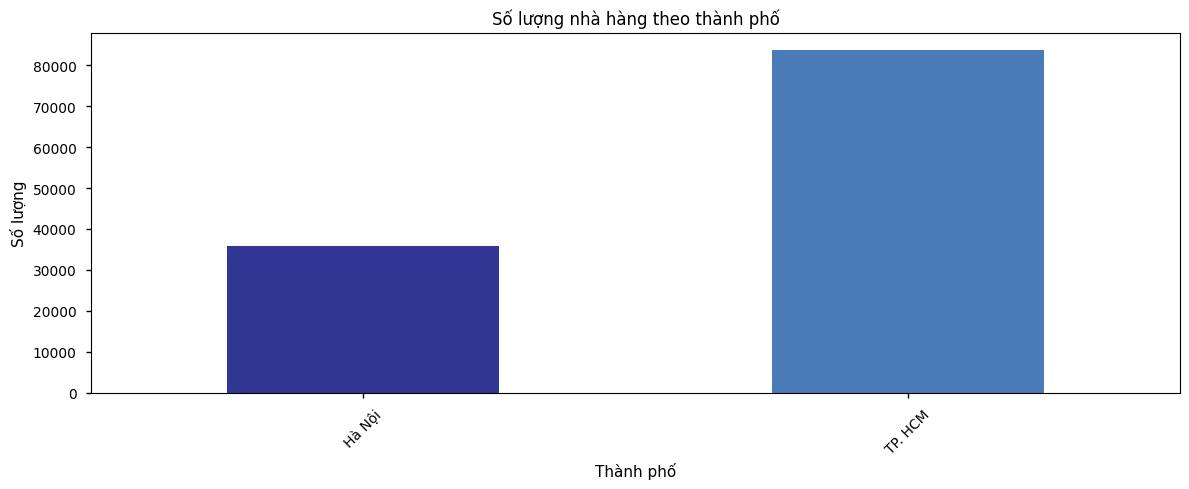

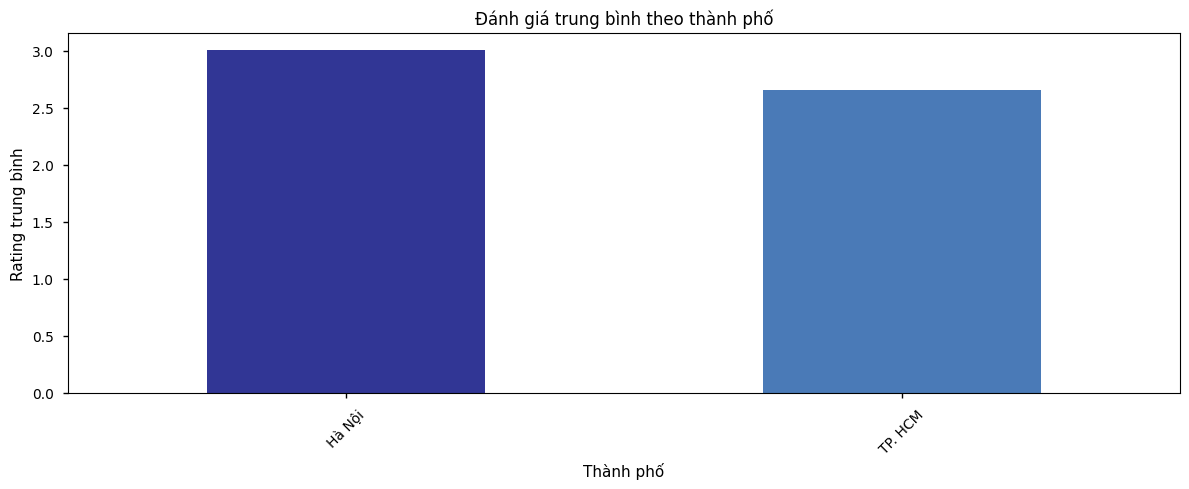

In [7]:
city_counts, city_ratings = city_analysis()

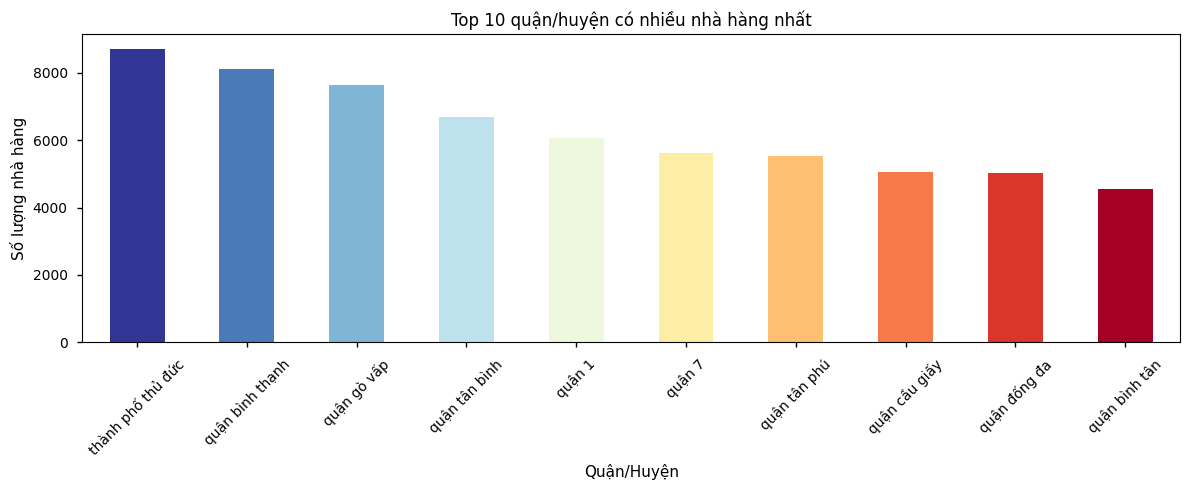

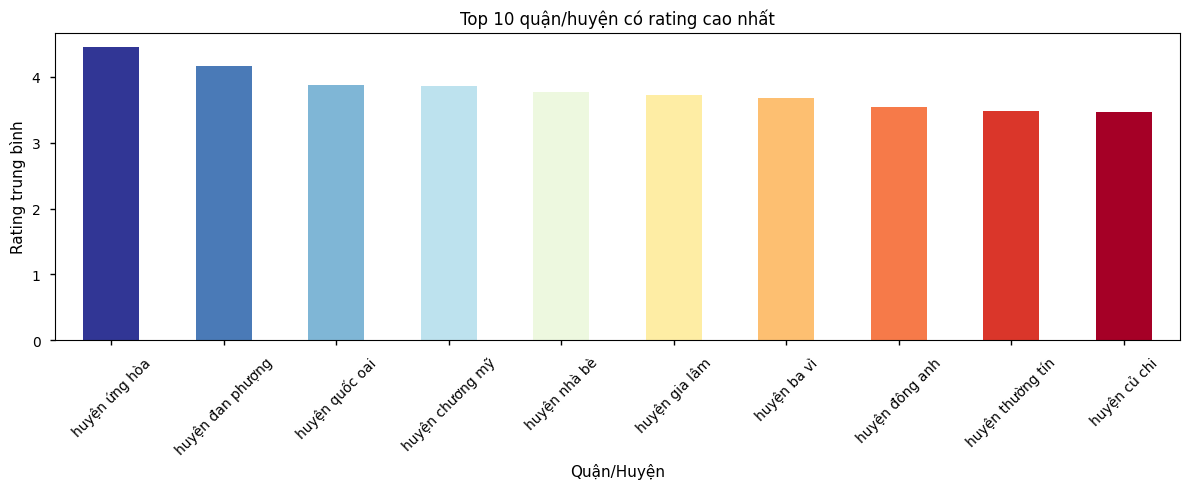

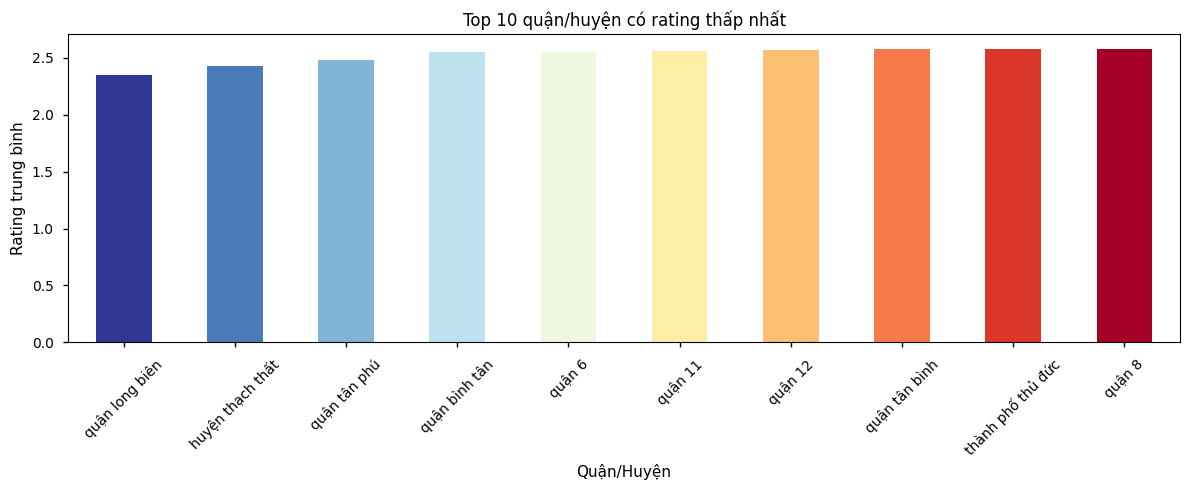

In [ ]:
# Phân tích theo quận/huyện
def district_analysis():
    district_stats = restaurant_df.merge(district_df, on='district_id', how='left')
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 10))
    # Top 10 quận/huyện nhiều nhà hàng nhất
    district_counts = district_stats.groupby('district_name')['restaurant_id'].count()
    top_10_districts = district_counts.nlargest(10)
    
    plt.figure(figsize=(12, 5))
    top_10_districts.plot(kind='bar', color = colors)
    plt.title('Top 10 quận/huyện có nhiều nhà hàng nhất')
    plt.xlabel('Quận/Huyện')
    plt.ylabel('Số lượng nhà hàng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Rating theo quận/huyện
    district_ratings = district_stats.groupby('district_name')['restaurant_rating'].mean()
    
    # Top 10 cao nhất
    plt.figure(figsize=(12, 5))
    district_ratings.nlargest(10).plot(kind='bar', color = colors)
    plt.title('Top 10 quận/huyện có rating cao nhất')
    plt.xlabel('Quận/Huyện')
    plt.ylabel('Rating trung bình')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Top 10 thấp nhất
    plt.figure(figsize=(12, 5))
    district_ratings.nsmallest(10).plot(kind='bar', color = colors)
    plt.title('Top 10 quận/huyện có rating thấp nhất')
    plt.xlabel('Quận/Huyện')
    plt.ylabel('Rating trung bình')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.style.use('seaborn-v0_8-notebook') 
    plt.show()
    
    return top_10_districts, district_ratings

top_districts, district_ratings = district_analysis()

/var/folders/3f/f7yl7cts573_0cl03b44qk8h0000gq/T/ipykernel_33255/707503847.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_foods.index, y=top_10_foods.values, palette = 'Set2')


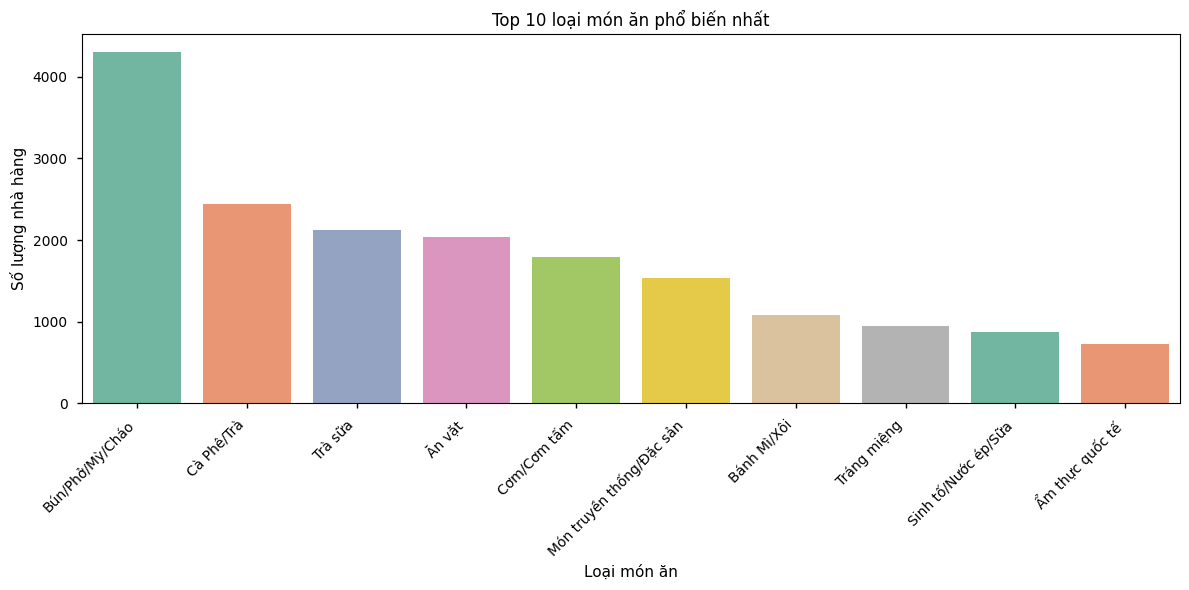


Phân bố số lượng nhà hàng theo loại món ăn:
food_type_name
Bún/Phở/Mỳ/Cháo             4305
Cà Phê/Trà                  2441
Trà sữa                     2129
Ăn vặt                      2042
Cơm/Cơm tấm                 1795
Món truyền thống/Đặc sản    1531
Bánh Mì/Xôi                 1078
Tráng miệng                  950
Sinh tố/Nước ép/Sữa          876
Ẩm thực quốc tế              721
Name: restaurant_id, dtype: int64


In [ ]:
# Top 10 loại món ăn phổ biến
def food_type_analysis():
    # Merge và tính toán
    food_stats = restaurant_df.merge(food_type_df, on='food_type_id', how='left')
    food_counts = food_stats.groupby('food_type_name')['restaurant_id'].count()
    
    # Loại bỏ Unknown nếu số lượng quá lớn so với các loại khác
    if 'Unknown' in food_counts.index:
        second_largest = food_counts[food_counts.index != 'Unknown'].max()
        if food_counts['Unknown'] > second_largest * 5:  # Nếu Unknown lớn hơn 5 lần giá trị lớn thứ 2
            food_counts = food_counts[food_counts.index != 'Unknown']
    
    # Lấy top 10
    top_10_foods = food_counts.nlargest(10)
    
    # Vẽ biểu đồ
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 10))
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_foods.index, y=top_10_foods.values, palette = 'Set2')
    sns.color_palette("tab10")
    plt.title('Top 10 loại món ăn phổ biến nhất')
    plt.xlabel('Loại món ăn')
    plt.ylabel('Số lượng nhà hàng')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.style.use('seaborn-v0_8-notebook') 
    plt.show()
    
    # In ra số liệu để kiểm tra
    print("\nPhân bố số lượng nhà hàng theo loại món ăn:")
    print(top_10_foods)
    
    return top_10_foods


top_foods = food_type_analysis()

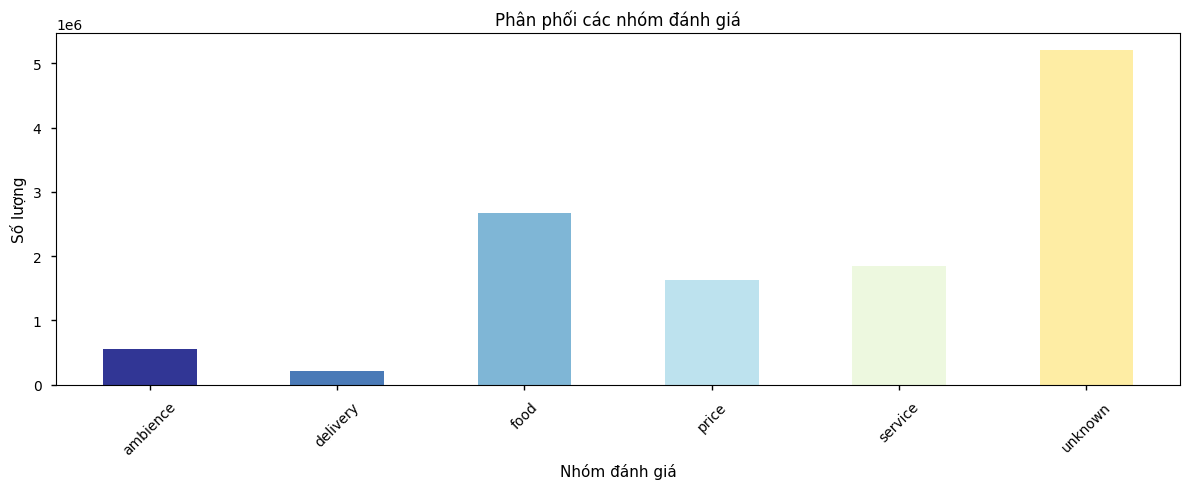

In [13]:
# Phân phối nhóm đánh giá
def feedback_analysis():
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 10))
    feedback_counts = review_df.merge(feedback_label_df, on='rating_id', how='left')\
        .groupby('label')['rating_id'].count()
    
    plt.figure(figsize=(12, 5))
    feedback_counts.plot(kind='bar', color = colors)
    plt.title('Phân phối các nhóm đánh giá')
    plt.xlabel('Nhóm đánh giá')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return feedback_counts

feedback_counts = feedback_analysis()

/var/folders/3f/f7yl7cts573_0cl03b44qk8h0000gq/T/ipykernel_33255/806851612.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group['restaurant_rating'].values for name, group in restaurant_food.groupby('food_type_name')],


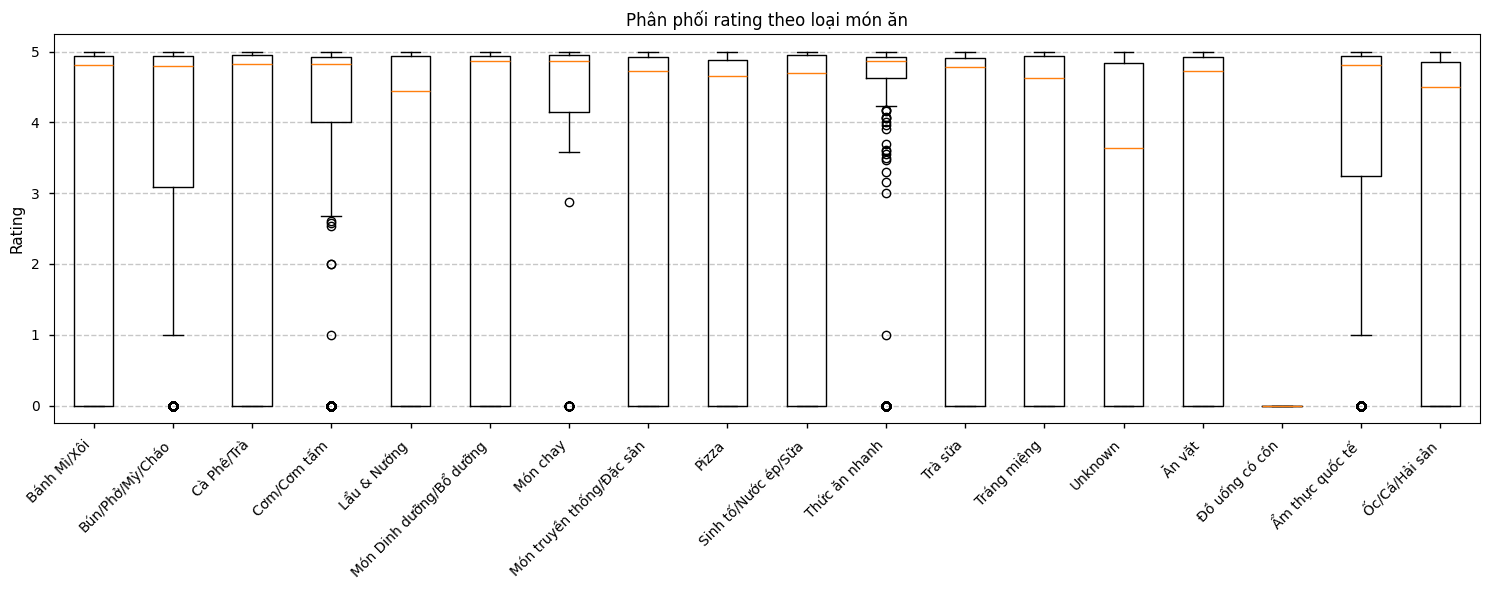

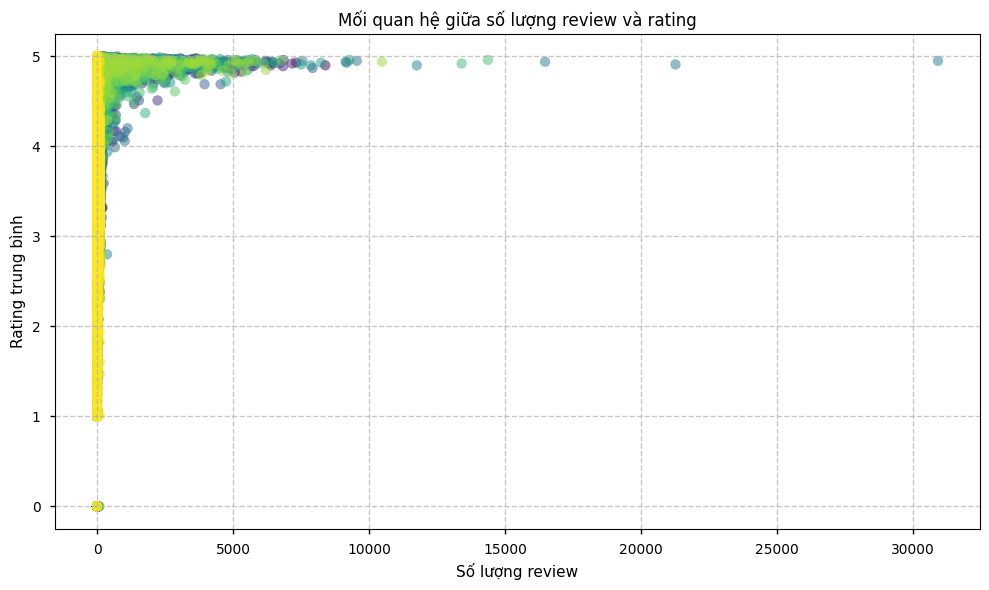

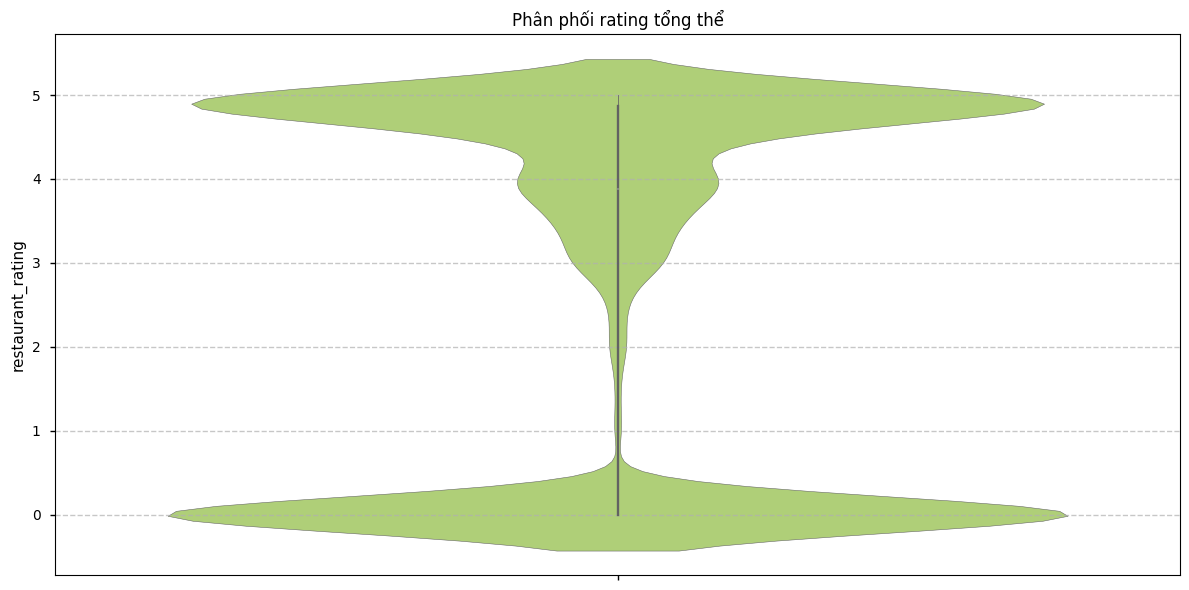

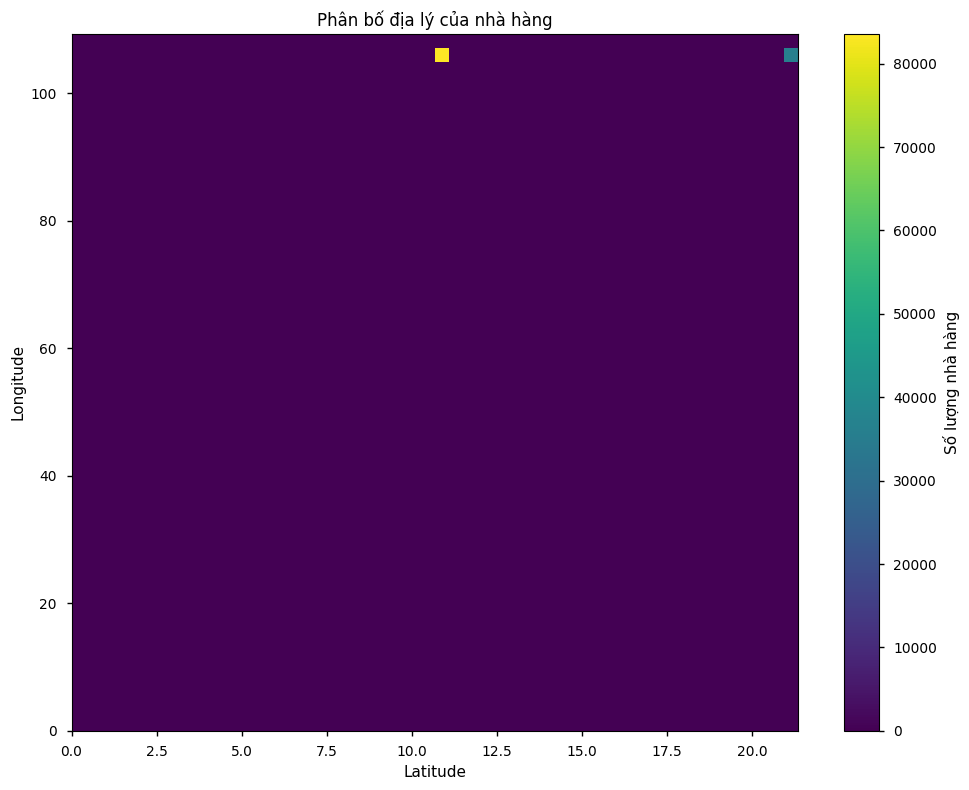

In [ ]:
def additional_analysis():
    # 1. Biểu đồ boxplot cho rating theo food_type
    plt.figure(figsize=(15, 6))
    restaurant_food = restaurant_df.merge(food_type_df, on='food_type_id', how='left')
    plt.boxplot([group['restaurant_rating'].values for name, group in restaurant_food.groupby('food_type_name')],
                labels=restaurant_food.groupby('food_type_name').groups.keys())
    plt.title('Phân phối rating theo loại món ăn')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Rating')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 2. Scatter plot giữa số lượng review và rating trung bình
    plt.figure(figsize=(10, 6))
    plt.scatter(restaurant_df['review_count'], restaurant_df['restaurant_rating'], 
                alpha=0.5, c=plt.cm.viridis(np.linspace(0, 1, len(restaurant_df))))
    plt.title('Mối quan hệ giữa số lượng review và rating')
    plt.xlabel('Số lượng review')
    plt.ylabel('Rating trung bình')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Chạy phân tích bổ sung
additional_analysis()